# Answer the questions

## Derive an analytical solution to the regression problem. Use a vector form of the equation

In a basic linear regression model, we want to find the best-fitting line for a dataset of input features X and an output target y. The relationship can be modeled as:            
y = Xβ + ϵ, where:

1. y is the vector of observed values,
2. is the matrix of input features (with an additional column of ones for the intercept),
3. β is the vector of coefficients (weights), and
4. ϵ is the error term.   
    
The goal is to minimize the sum of squared errors (SSE) given by:   
L(β)=∣∣y−Xβ∣∣^2   
To derive the analytical solution, we set the gradient of the loss function with respect to β to zero:   
∇L(β) = −2X^T * (y−Xβ) = 0   
This leads to the normal equation:   
X^T * Xβ = X^T * y   
Assuming X^T * x is invertible, the analytical solution for β is:   
β=(X^T * X) ^ -1 * X^T * y    

## What changes in the solution when L1 and L2 regularizations are added to the loss function

When we add regularizations:
1. L2 Regularization (Ridge Regression): The loss function modifies to:   
L(β)=∣∣y−Xβ∣∣^2 + λ∣∣β∣∣^2   
The solution for β becomes: β=(X^T * X+λI)^−1 * X^T * y   
Here, λ is the regularization parameter that controls the strength of the penalty. L2 regularization shrinks the coefficients but does not set them to zero.   
2. L1 Regularization (Lasso Regression): The loss function modifies to:   
L(β)=∣∣y−Xβ∣∣^2 + λ∣∣β∣∣  
The presence of the L1 penalty leads to a non-differentiable term, which causes some coefficients to become exactly zero, effectively selecting a simpler model by performing feature selection.   

## Explain why L1 regularization is often used to select features. Why are there many weights equal to 0 after the model is fit?

L1 regularization is often preferred for feature selection because:
1. It induces sparsity in the coefficient vector β. As a result, many coefficients are pushed to zero, thus selecting only a subset of the features in the data.
2. This property is beneficial for scenarios with high-dimensional data where many features might be irrelevant.

After fitting a model with L1 regularization many weights become exactly zero, indicating that those features do not contribute significantly to the prediction of the target variable. Therefore, these features can be safely excluded from the model without much loss of information.

## Explain how you can use the same models (Linear regression, Ridge, etc.) but make it possible to fit nonlinear dependencies

To fit nonlinear dependencies while using models like Linear Regression, Ridge, etc., we can apply several techniques:
1. Polynomial Features:   
Transform input features into polynomial terms. For a feature x, we can add x^2, x^3, etc.   
2. Feature Interactions:   
Create new features by multiplying existing features, which allow the model to capture interaction effects.
3. Splines and Basis Functions:   
Use splines or radial basis functions to represent nonlinear relationships.
4. Kernel Tricks:   
For models like Support Vector Machines (SVM) or Gaussian Processes, using a kernel method implicitly maps the input into a higher-dimensional space where a linear separation could occur.

# Introduction

## Imports

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split

## Preprocessing Part 1

In [2]:
raw_train_data = pd.read_json('data/train.json')
data_trains = raw_train_data[['bathrooms', 'bedrooms', 'features', 'price']]
data_train = data_trains.copy()

lower_bound = data_train['price'].quantile(0.01)
upper_bound = data_train['price'].quantile(0.99)
data_train = data_train[(data_train['price'] >= lower_bound) & (data_train['price'] <= upper_bound)]

data_train

,bathrooms,bedrooms,features,price
4,1.0,1,"[Dining Room, Pre-War, Laundry in Building, Di...",2400
6,1.0,2,"[Doorman, Elevator, Laundry in Building, Dishw...",3800
9,1.0,2,"[Doorman, Elevator, Laundry in Building, Laund...",3495
10,1.5,3,[],3000
15,1.0,0,"[Doorman, Elevator, Fitness Center, Laundry in...",2795
...,...,...,...,...
124000,1.0,3,"[Elevator, Dishwasher, Hardwood Floors]",2800
124002,1.0,2,"[Common Outdoor Space, Cats Allowed, Dogs Allo...",2395
124004,1.0,1,"[Dining Room, Elevator, Pre-War, Laundry in Bu...",1850
124008,1.0,2,"[Pre-War, Laundry in Unit, Dishwasher, No Fee,...",4195


In [3]:
raw_test_data = pd.read_json('data/test.json')
data_tests = raw_test_data[['bathrooms', 'bedrooms', 'features', 'price']]
data_test = data_tests.copy()

data_test

,bathrooms,bedrooms,features,price
0,1.0,1,"[Elevator, Laundry in Building, Laundry in Uni...",2950
1,1.0,2,"[Pre-War, Dogs Allowed, Cats Allowed]",2850
2,1.0,0,"[Pre-War, Dogs Allowed, Cats Allowed]",2295
3,1.0,2,"[Hardwood Floors, Dogs Allowed, Cats Allowed]",2900
5,1.0,1,"[Roof Deck, Doorman, Elevator, Fitness Center,...",3254
...,...,...,...,...
124003,1.0,1,[],1700
124005,1.0,2,"[Doorman, Elevator, Laundry in Building, Dishw...",4195
124006,1.0,0,"[Dogs Allowed, Cats Allowed]",2400
124007,2.0,2,"[Doorman, Elevator, Cats Allowed, Dogs Allowed]",6895


# Intro data analysis part 2

## Preprocessing Part 2

In [ ]:
def clean_features(features):
    cleaned_features = []
    for f in features:
        # Remove extra characters
        cleaned_f = str(f).replace("'", "").replace('"', '').replace('[', '').replace(']', '').strip()
        cleaned_features.append(cleaned_f)
    return cleaned_features

In [ ]:
# Clearing the Features column
data_train['features'] = data_train['features'].apply(clean_features)

# Create a list of all functions
all_features = []
for index, row in data_train.iterrows():
    # Separate the values ​​by commas and add them to the general list
    features = row['features']
    all_features.extend(features)

# Counting unique values
unique_values = set(all_features)
print(f"Количество уникальных значений: {len(unique_values)}")

# Using the collections library to count frequencies
counter = Counter(all_features)
top_20_features = counter.most_common(20)
print(f"Топ-20 популярных функций: {top_20_features}")

# Creating new features based on top 20 functions
for feature_name, _ in top_20_features:
    data_train[feature_name] = data_train['features'].apply(lambda x: int(feature_name in x))

# Combining all features into one list
feature_list = ['bathrooms', 'bedrooms'] + [x[0] for x in top_20_features]
print(f"Список всех признаков: {feature_list}")

data_train.drop(columns=['features'], inplace=True)
data_train.reset_index(drop=True, inplace=True)
data_train.info()

Количество уникальных значений: 1536
Топ-20 популярных функций: [('Elevator', 25398), ('Hardwood Floors', 23159), ('Cats Allowed', 23148), ('Dogs Allowed', 21662), ('Doorman', 20497), ('Dishwasher', 20095), ('No Fee', 17806), ('Laundry in Building', 16093), ('Fitness Center', 13000), ('Pre-War', 8978), ('Laundry in Unit', 8448), ('Roof Deck', 6423), ('Outdoor Space', 5137), ('Dining Room', 4901), ('High Speed Internet', 4225), ('Balcony', 2898), ('Swimming Pool', 2648), ('Laundry In Building', 2565), ('New Construction', 2507), ('Terrace', 2179)]
Список всех признаков: ['bathrooms', 'bedrooms', 'Elevator', 'Hardwood Floors', 'Cats Allowed', 'Dogs Allowed', 'Doorman', 'Dishwasher', 'No Fee', 'Laundry in Building', 'Fitness Center', 'Pre-War', 'Laundry in Unit', 'Roof Deck', 'Outdoor Space', 'Dining Room', 'High Speed Internet', 'Balcony', 'Swimming Pool', 'Laundry In Building', 'New Construction', 'Terrace']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48379 entries, 0 to 48378
Dat

In [ ]:
# Clearing the Features column
data_test['features'] = data_test['features'].apply(clean_features)

# Create a list of all functions
all_features = []
for index, row in data_test.iterrows():
    # Separate the values ​​by commas and add them to the general list
    features = row['features']
    all_features.extend(features)

# Counting unique values
unique_values = set(all_features)
print(f"Количество уникальных значений: {len(unique_values)}")

# Creating new features based on top 20 functions
for feature_name, _ in top_20_features:
    data_test[feature_name] = data_test['features'].apply(lambda x: int(feature_name in x))

# Combining all features into one list
feature_list = ['bathrooms', 'bedrooms'] + [x[0] for x in top_20_features]
print(f"Список всех признаков: {feature_list}")

data_test.drop(columns=['features'], inplace=True)
data_test.reset_index(drop=True, inplace=True)
data_test.info()

Количество уникальных значений: 2101
Список всех признаков: ['bathrooms', 'bedrooms', 'Elevator', 'Hardwood Floors', 'Cats Allowed', 'Dogs Allowed', 'Doorman', 'Dishwasher', 'No Fee', 'Laundry in Building', 'Fitness Center', 'Pre-War', 'Laundry in Unit', 'Roof Deck', 'Outdoor Space', 'Dining Room', 'High Speed Internet', 'Balcony', 'Swimming Pool', 'Laundry In Building', 'New Construction', 'Terrace']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74659 entries, 0 to 74658
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   bathrooms            74659 non-null  float64
 1   bedrooms             74659 non-null  int64  
 2   price                74659 non-null  int64  
 3   Elevator             74659 non-null  int64  
 4   Hardwood Floors      74659 non-null  int64  
 5   Cats Allowed         74659 non-null  int64  
 6   Dogs Allowed         74659 non-null  int64  
 7   Doorman              74659 non-

# Models implementation — Linear regression

## My LinearRegressionSGN

In [7]:
X_train = data_train.drop('price', axis=1)
y_train = data_train['price']
X_test = data_test.drop('price', axis=1)
y_test = data_test['price']

In [8]:
y_train.index

RangeIndex(start=0, stop=48379, step=1)

In [9]:
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [ ]:
class LinearRegressionSGD:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)

        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        for _ in range(self.n_iterations):
            for idx in range(n_samples):
                linear_pred = np.dot(X[idx], self.weights) + self.bias
                error = linear_pred - y[idx]
                
                # Updating weights and bias
                self.weights -= self.learning_rate * error * X[idx]
                self.bias -= self.learning_rate * error

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

In [ ]:
class LinearRegressionAnalytic:
    def fit(self, X, y):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]  # add x0 = 1
        self.weights = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

    def predict(self, X):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]  # add x0 = 1
        return X_b @ self.weights

In [12]:
def r2_score(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    return 1 - (ss_residual / ss_total)

In [13]:
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

In [14]:
linear_sgd = LinearRegressionSGD()
linear_sgd.fit(X_train, y_train)
y_train_pred_sgd = linear_sgd.predict(X_train)
y_test_pred_sgd = linear_sgd.predict(X_test)

linear_analytic = LinearRegressionAnalytic()
linear_analytic.fit(X_train, y_train)
y_train_pred_anal = linear_analytic.predict(X_train)
y_test_pred_anal = linear_analytic.predict(X_test)

sklearn_model = LinearRegression()
sklearn_model.fit(X_train, y_train)
y_train_pred_sklearn = sklearn_model.predict(X_train)
y_test_pred_sklearn = sklearn_model.predict(X_test)

In [15]:
metrics = {
    'Model': [],
    'Train MAE': [],
    'Test MAE': [],
    'Train RMSE': [],
    'Test RMSE': [],
    'Train R2': [],
    'Test R2': []
}

for name, y_train_pred, y_test_pred in [
    ('LinearRegressionSGD', y_train_pred_sgd, y_test_pred_sgd),
    ('LinearRegressionAnalytic', y_train_pred_anal, y_test_pred_anal),
    ('LinearRegression / Sk', y_train_pred_sklearn, y_test_pred_sklearn),
]:
    train_mae, train_rmse, train_r2 = evaluate_model(y_train, y_train_pred)
    test_mae, test_rmse, test_r2 = evaluate_model(y_test, y_test_pred)
    
    metrics['Model'].append(name)
    metrics['Train MAE'].append(train_mae)
    metrics['Test MAE'].append(test_mae)
    metrics['Train RMSE'].append(train_rmse)
    metrics['Test RMSE'].append(test_rmse)
    metrics['Train R2'].append(train_r2)
    metrics['Test R2'].append(test_r2)

metrics_df = pd.DataFrame(metrics)
metrics_df

,Model,Train MAE,Test MAE,Train RMSE,Test RMSE,Train R2,Test R2
0,LinearRegressionSGD,718.081663,920.993858,1071.763291,9609.922737,0.549975,0.021117
1,LinearRegressionAnalytic,711.791166,909.889672,1035.351576,9603.903231,0.580034,0.022343
2,LinearRegression / Sk,711.791166,909.889672,1035.351576,9603.903231,0.580034,0.022343


# Regularized models implementation — Ridge, Lasso, ElasticNet

## My implementation of RidgeRegression

In [ ]:
class RidgeRegression:
    def __init__(self, alpha=1.0, learning_rate=0.01, n_iterations=1000):
        self.alpha = alpha
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        for _ in range(self.n_iterations):
            linear_pred = np.dot(X, self.weights) + self.bias
            error = linear_pred - y
            
            # Update weights with L2 regularization
            dw = (1/n_samples) * np.dot(X.T, error) + (self.alpha/n_samples) * self.weights
            db = (1/n_samples) * np.sum(error)
            
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

## My implementation of LassoRegression

In [ ]:
class LassoRegression:
    def __init__(self, alpha=1.0, learning_rate=0.01, n_iterations=1000):
        self.alpha = alpha
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        for _ in range(self.n_iterations):
            linear_pred = np.dot(X, self.weights) + self.bias
            error = linear_pred - y
            
            # Update weights with L1 regularization
            dw = (1/n_samples) * np.dot(X.T, error)
            
            # Applying L1 regularization (simplified subgradient approach)
            dw += self.alpha * np.sign(self.weights)
            db = (1/n_samples) * np.sum(error)
            
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

## My implementation of ElasticNetRegression

In [ ]:
class ElasticNetRegression:
    def __init__(self, alpha=1.0, lambda_l1=0.5, learning_rate=0.01, n_iterations=1000):
        self.alpha = alpha
        self.lambda_l1 = lambda_l1
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        for _ in range(self.n_iterations):
            linear_pred = np.dot(X, self.weights) + self.bias
            error = linear_pred - y
            
            # Update weights taking into account both regularizations
            dw = (1/n_samples) * np.dot(X.T, error) + self.alpha * (1 - self.lambda_l1) * self.weights
            dw += self.alpha * self.lambda_l1 * np.sign(self.weights)
            db = (1/n_samples) * np.sum(error)
            
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

In [19]:
ridge_model = RidgeRegression(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_train_pred_ridge = ridge_model.predict(X_train)
y_test_pred_ridge = ridge_model.predict(X_test)

lasso_model = LassoRegression(alpha=1.0)
lasso_model.fit(X_train, y_train)
y_train_pred_lasso = lasso_model.predict(X_train)
y_test_pred_lasso = lasso_model.predict(X_test)

elastic_net_model = ElasticNetRegression(alpha=1.0, lambda_l1=0.5)
elastic_net_model.fit(X_train, y_train)
y_train_pred_en = elastic_net_model.predict(X_train)
y_test_pred_en = elastic_net_model.predict(X_test)

sklearn_ridge = Ridge(alpha=1.0)
sklearn_ridge.fit(X_train, y_train)
y_train_pred_sklearn_ridge = sklearn_ridge.predict(X_train)
y_test_pred_sklearn_ridge = sklearn_ridge.predict(X_test)

sklearn_lasso = Lasso(alpha=1.0)
sklearn_lasso.fit(X_train, y_train)
y_train_pred_sklearn_lasso = sklearn_lasso.predict(X_train)
y_test_pred_sklearn_lasso = sklearn_lasso.predict(X_test)

sklearn_en = ElasticNet(alpha=1.0, l1_ratio=0.5)
sklearn_en.fit(X_train, y_train)
y_train_pred_sklearn_en = sklearn_en.predict(X_train)
y_test_pred_sklearn_en = sklearn_en.predict(X_test)

In [20]:
metrics = {
    'Model': [],
    'Train MAE': [],
    'Test MAE': [],
    'Train RMSE': [],
    'Test RMSE': [],
    'Train R2': [],
    'Test R2': []
}

for name, y_train_pred, y_test_pred in [
    ('Ridge / Own', y_train_pred_ridge, y_test_pred_ridge),
    ('Lasso / Own', y_train_pred_lasso, y_test_pred_lasso),
    ('ElasticNet / Own', y_train_pred_en, y_test_pred_en),
    ('Ridge / Sk', y_train_pred_sklearn_ridge, y_test_pred_sklearn_ridge),
    ('Lasso / Sk', y_train_pred_sklearn_lasso, y_test_pred_sklearn_lasso),
    ('ElasticNet / Sk', y_train_pred_sklearn_en, y_test_pred_sklearn_en),
]:
    train_mae, train_rmse, train_r2 = evaluate_model(y_train, y_train_pred)
    test_mae, test_rmse, test_r2 = evaluate_model(y_test, y_test_pred)
    
    metrics['Model'].append(name)
    metrics['Train MAE'].append(train_mae)
    metrics['Test MAE'].append(test_mae)
    metrics['Train RMSE'].append(train_rmse)
    metrics['Test RMSE'].append(test_rmse)
    metrics['Train R2'].append(train_r2)
    metrics['Test R2'].append(test_r2)

metrics_df_1 = pd.DataFrame(metrics)
metrics_df_1

,Model,Train MAE,Test MAE,Train RMSE,Test RMSE,Train R2,Test R2
0,Ridge / Own,714.464092,915.241402,1042.964371,9604.315065,0.573835,0.022259
1,Lasso / Own,714.690934,915.574754,1043.450015,9604.483551,0.573438,0.022225
2,ElasticNet / Own,781.214383,997.684362,1167.398242,9627.121413,0.466079,0.017610
3,Ridge / Sk,711.787958,909.889257,1035.351581,9603.902155,0.580034,0.022343
4,Lasso / Sk,711.397528,909.673381,1035.548526,9604.188597,0.579874,0.022285
5,ElasticNet / Sk,807.091675,1025.775253,1189.929013,9631.131965,0.445271,0.016792


# Feature normalization

## My implementation of MinMaxScaler

In [21]:
def min_max_scaler(X):
    X_min = np.min(X, axis=0)
    X_max = np.max(X, axis=0)
    X_scaled = (X - X_min) / (X_max - X_min)
    return X_scaled

In [22]:
scaler = MinMaxScaler()
data_train_scaled_sklearn = scaler.fit_transform(data_train)

In [23]:
data_train_scaled_own = min_max_scaler(data_train)

In [24]:
comparison = np.allclose(data_train_scaled_own, data_train_scaled_sklearn)
comparison

True

## My implementation of StandartScaler

In [25]:
def standard_scaler(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X_scaled = (X - mean) / std
    return X_scaled

In [26]:
scaler_standard = StandardScaler()
data_train_scaled_standard_sklearn = scaler_standard.fit_transform(data_train)

In [27]:
data_train_scaled_standard_own = standard_scaler(data_train)

In [28]:
comparison_standard = np.allclose(data_train_scaled_standard_own, data_train_scaled_standard_sklearn)
comparison_standard

True

# Fit models with normalization

## When Normalization Is Required  
### Methods that are sensitive to feature scale:  
Example: K-Nearest Neighbors (KNN)  
KNN uses distances to determine the nearest neighbors, and if one of the features has a significantly larger scale, this can skew the results.  
### Gradient Optimization Methods:  
Example: Logistic Regression  
When using gradient descent, different feature scales can lead to slow convergence. Normalization helps stabilize training.  
### Complex Algorithms:  
Example: Support Vector Machine (SVM)  
SVM maximizes the gap between classes, and feature scales can affect the results. Normalization makes the influence of features equal.  

## When Normalization Is Not Required  
### Decision Trees:  
Example: Decision Tree  
Decision trees do not rely on distances between features, so normalization does not affect their performance. They can use raw data.  
### Rule-based methods:  
Example: Boosting (e.g., AdaBoost)  
These algorithms also do not require normalization, as they focus on a single classification metric rather than the distance between observations.  
### Handling Categorical Data:  
Example: One-hot Encoding  
When the input data is represented as categorical features that are assigned binary values, normalization is not required, as it does not make sense for binary features.  

In [ ]:
minmax_scaler = MinMaxScaler()
X_train_minmax = minmax_scaler.fit_transform(X_train)
X_test_minmax = minmax_scaler.transform(X_test)

models = {
    "Linear RegressionSDG": LinearRegressionSGD(),
    "Ridge / Own": RidgeRegression(alpha=1.0),
    "Lasso / Own": LassoRegression(alpha=1.0),
    "ElasticNet / Own": ElasticNetRegression(alpha=1.0, lambda_l1=0.5),
    "Linear Regression / Sk": LinearRegression(),
    "Ridge / Sk": Ridge(alpha=1.0),
    "Lasso / Sk": Lasso(alpha=1.0),
    "ElasticNet / Sk": ElasticNet(alpha=1.0, l1_ratio=0.5)
}

results_minmax = []

for model_name, model in models.items():
    model.fit(X_train_minmax, y_train)
    y_train_pred = model.predict(X_train_minmax)
    y_test_pred = model.predict(X_test_minmax)
    
    results_minmax.append({
        "Model": model_name,
        "Train MAE / MM": mean_absolute_error(y_train, y_train_pred),
        "Test MAE / MM": mean_absolute_error(y_test, y_test_pred),
        "Train RMSE / MM": np.sqrt(mean_squared_error(y_train, y_train_pred)),
        "Test RMSE / MM": np.sqrt(mean_squared_error(y_test, y_test_pred)),
        "Train R2 / MM": r2_score(y_train, y_train_pred),
        "Test R2 / MM": r2_score(y_test, y_test_pred)
    })

results_minmax_df = pd.DataFrame(results_minmax)
results_minmax_df


,Model,Train MAE / MM,Test MAE / MM,Train RMSE / MM,Test RMSE / MM,Train R2 / MM,Test R2 / MM
0,Linear RegressionSDG,714.428493,914.901636,1058.381252,9609.563167,0.561143,0.021191
1,Ridge / Own,938.068537,1159.911311,1358.878458,9663.430724,0.276565,0.010186
2,Lasso / Own,938.494882,1160.428409,1359.595828,9663.671544,0.275801,0.010137
3,ElasticNet / Own,1044.473702,1274.275635,1487.642522,9693.243306,0.132967,0.004069
4,Linear Regression / Sk,711.791166,909.889672,1035.351576,9603.903231,0.580034,0.022343
5,Ridge / Sk,711.868658,910.173752,1035.384206,9603.632009,0.580007,0.022398
6,Lasso / Sk,711.649590,910.537490,1035.775591,9603.639492,0.579690,0.022397
7,ElasticNet / Sk,1057.169792,1287.280940,1492.374749,9693.666228,0.127442,0.003982


In [30]:
standard_scaler = StandardScaler()
X_train_standard = standard_scaler.fit_transform(X_train)
X_test_standard = standard_scaler.transform(X_test)

results_standard = []

for model_name, model in models.items():
    model.fit(X_train_standard, y_train)
    y_train_pred = model.predict(X_train_standard)
    y_test_pred = model.predict(X_test_standard)
    
    results_standard.append({
        "Model": model_name,
        "Train MAE / SS": mean_absolute_error(y_train, y_train_pred),
        "Test MAE / SS": mean_absolute_error(y_test, y_test_pred),
        "Train RMSE / SS": np.sqrt(mean_squared_error(y_train, y_train_pred)),
        "Test RMSE / SS": np.sqrt(mean_squared_error(y_test, y_test_pred)),
        "Train R2 / SS": r2_score(y_train, y_train_pred),
        "Test R2 / SS": r2_score(y_test, y_test_pred)
    })

results_standard_df = pd.DataFrame(results_standard)
results_standard_df

,Model,Train MAE / SS,Test MAE / SS,Train RMSE / SS,Test RMSE / SS,Train R2 / SS,Test R2 / SS
0,Linear RegressionSDG,783.481278,979.544714,1109.470293,9609.350958,0.517753,0.021234
1,Ridge / Own,711.789367,909.907635,1035.411305,9603.943269,0.579985,0.022335
2,Lasso / Own,711.598849,909.789976,1035.440540,9604.046446,0.579962,0.022314
3,ElasticNet / Own,741.715205,950.353052,1080.580304,9611.448062,0.542541,0.020807
4,Linear Regression / Sk,711.791166,909.889672,1035.351576,9603.903231,0.580034,0.022343
5,Ridge / Sk,711.790594,909.889695,1035.351576,9603.903249,0.580034,0.022343
6,Lasso / Sk,711.607870,909.784682,1035.380712,9604.018035,0.580010,0.022320
7,ElasticNet / Sk,741.748433,950.385313,1080.579281,9611.444892,0.542541,0.020807


# Overfit models

In [31]:
X_train_poly = X_train[['bathrooms', 'bedrooms']]
X_test_poly = X_test[['bathrooms', 'bedrooms']]

In [32]:
poly = PolynomialFeatures(degree=10)
X_train_poly = poly.fit_transform(X_train_poly)
X_test_poly = poly.transform(X_test_poly)

In [ ]:
alpha_values = [0.01, 0.1, 1, 10, 100]

models = {
    "Linear Regression / Sk": LinearRegression(),
    "Ridge / Sk": Ridge(),
    "Lasso / Sk": Lasso(),
    "ElasticNet / Sk": ElasticNet()
}

results = []

for alpha in alpha_values:
    for model_name, model in models.items():
        if model_name in ['Ridge', 'Lasso', 'ElasticNet']:
            model.set_params(alpha=alpha)

        model.fit(X_train_poly, y_train)
        y_train_pred = model.predict(X_train_poly)
        y_test_pred = model.predict(X_test_poly)
        
        results.append({
            "Model": f"{model_name} (alpha={alpha})",
            "Train MAE / Poly": mean_absolute_error(y_train, y_train_pred),
            "Test MAE / Poly": mean_absolute_error(y_test, y_test_pred),
            "Train RMSE / Poly": np.sqrt(mean_squared_error(y_train, y_train_pred)),
            "Test RMSE / Poly": np.sqrt(mean_squared_error(y_test, y_test_pred)),
            "Train R2 / Poly": r2_score(y_train, y_train_pred),
            "Test R2 / Poly": r2_score(y_test, y_test_pred)
        })

results_df = pd.DataFrame(results)
results_df

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.877e+10, tolerance: 1.235e+07
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.955e+10, tolerance: 1.235e+07
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

,Model,Train MAE / Poly,Test MAE / Poly,Train RMSE / Poly,Test RMSE / Poly,Train R2 / Poly,Test R2 / Poly
0,Linear Regression / Sk (alpha=0.01),756.040301,1.448891e+16,1077.566356,3.958921e+18,0.545089,-1.661286e+29
1,Ridge / Sk (alpha=0.01),756.489063,4.559712e+15,1078.255103,1.245887e+18,0.544507,-1.645311e+28
2,Lasso / Sk (alpha=0.01),761.797661,1.165068e+10,1087.884116,3.183408e+12,0.536336,-1.074176e+17
3,ElasticNet / Sk (alpha=0.01),767.969117,1.607383e+10,1094.692635,4.391981e+12,0.530514,-2.044616e+17
4,Linear Regression / Sk (alpha=0.1),756.040301,1.448891e+16,1077.566356,3.958921e+18,0.545089,-1.661286e+29
5,Ridge / Sk (alpha=0.1),756.489063,4.559712e+15,1078.255103,1.245887e+18,0.544507,-1.645311e+28
6,Lasso / Sk (alpha=0.1),761.797661,1.165068e+10,1087.884116,3.183408e+12,0.536336,-1.074176e+17
7,ElasticNet / Sk (alpha=0.1),767.969117,1.607383e+10,1094.692635,4.391981e+12,0.530514,-2.044616e+17
8,Linear Regression / Sk (alpha=1),756.040301,1.448891e+16,1077.566356,3.958921e+18,0.545089,-1.661286e+29
9,Ridge / Sk (alpha=1),756.489063,4.559712e+15,1078.255103,1.245887e+18,0.544507,-1.645311e+28


# Native Models

In [34]:
result = metrics_df
for df in [metrics_df_1, results_minmax_df, results_standard_df, results_df]:
    result = pd.merge(result, df, on='Model', how='outer')

In [35]:
mean_metrics = result.mean(numeric_only=True)
median_metrics = result.median(numeric_only=True)

In [36]:
mean_df = pd.DataFrame(mean_metrics).T
mean_df.insert(0, 'Model', 'Mean')

result = pd.concat([result, mean_df], ignore_index=True)

In [37]:
median_df = pd.DataFrame(median_metrics).T
median_df.insert(0, 'Model', 'Median')

result = pd.concat([result, median_df], ignore_index=True)

# Compare results

In [38]:
result

,Model,Train MAE_x,Test MAE_x,Train RMSE_x,Test RMSE_x,Train R2_x,Test R2_x,Train MAE_y,Test MAE_y,Train RMSE_y,...,Train RMSE / SS,Test RMSE / SS,Train R2 / SS,Test R2 / SS,Train MAE / Poly,Test MAE / Poly,Train RMSE / Poly,Test RMSE / Poly,Train R2 / Poly,Test R2 / Poly
0,ElasticNet / Own,NaN,NaN,NaN,NaN,NaN,NaN,781.214383,997.684362,1167.398242,...,1080.580304,9611.448062,0.542541,0.020807,NaN,NaN,NaN,NaN,NaN,NaN
1,ElasticNet / Sk,NaN,NaN,NaN,NaN,NaN,NaN,807.091675,1025.775253,1189.929013,...,1080.579281,9611.444892,0.542541,0.020807,NaN,NaN,NaN,NaN,NaN,NaN
2,ElasticNet / Sk (alpha=0.01),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,767.969117,1.607383e+10,1094.692635,4.391981e+12,0.530514,-2.044616e+17
3,ElasticNet / Sk (alpha=0.1),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,767.969117,1.607383e+10,1094.692635,4.391981e+12,0.530514,-2.044616e+17
4,ElasticNet / Sk (alpha=1),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,767.969117,1.607383e+10,1094.692635,4.391981e+12,0.530514,-2.044616e+17
5,ElasticNet / Sk (alpha=10),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,767.969117,1.607383e+10,1094.692635,4.391981e+12,0.530514,-2.044616e+17
6,ElasticNet / Sk (alpha=100),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,767.969117,1.607383e+10,1094.692635,4.391981e+12,0.530514,-2.044616e+17
7,Lasso / Own,NaN,NaN,NaN,NaN,NaN,NaN,714.690934,915.574754,1043.450015,...,1035.440540,9604.046446,0.579962,0.022314,NaN,NaN,NaN,NaN,NaN,NaN
8,Lasso / Sk,NaN,NaN,NaN,NaN,NaN,NaN,711.397528,909.673381,1035.548526,...,1035.380712,9604.018035,0.580010,0.022320,NaN,NaN,NaN,NaN,NaN,NaN
9,Lasso / Sk (alpha=0.01),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,761.797661,1.165068e+10,1087.884116,3.183408e+12,0.536336,-1.074176e+17


## The best method turned out to be <i>LassoRegression with MinMaxScaler normalization

# Addition task

In [72]:
X_train, X_test, y_train, y_test = train_test_split(data_train.drop('price', axis=1), data_train['price'], train_size=0.2, random_state=42)

In [73]:
y_train_log = np.log1p(y_train)  # log(Y + 1)

model = LinearRegression()
model.fit(X_train, y_train_log)

model = LinearRegression()
model.fit(X_train, y_train_log)

y_pred_log = model.predict(X_test)
y_pred = np.expm1(y_pred_log)  # exp(predictions) - 1

In [74]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

r_2 = r2_score(y_test, y_pred)
print(f'R^2: {r_2}')

Mean Squared Error: 2.6261573898733584e-23
R^2: 1.0


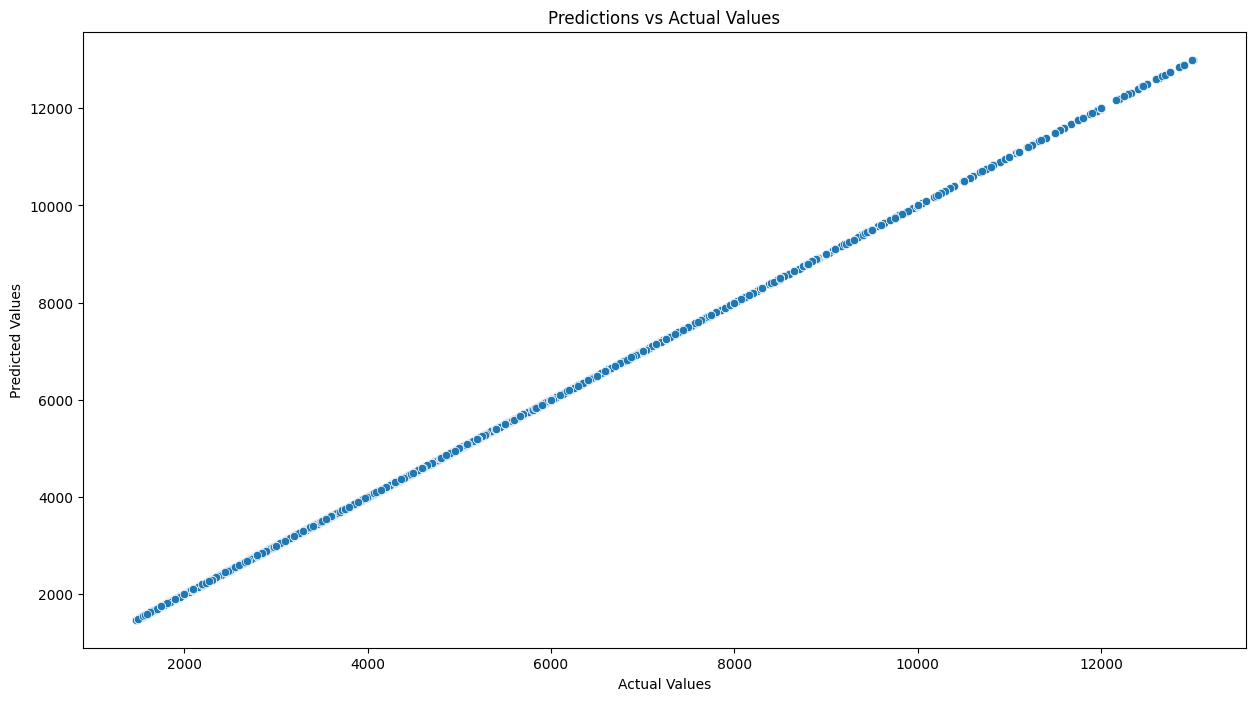

In [75]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x=y_test, y=y_pred)
plt.title('Predictions vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()